### Student Information
Name: 李松鴻

Student ID: 110011565

GitHub ID: anung1125

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import random as rd
rd.seed(565)

## **Part 1:** Take Home Excercises


In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#Answer here
X.loc[X['category']==1][:10]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1  comp.graphics
39  From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1  comp.graphics
42  From: gwang@magnus.acs.ohio-state.edu (Ge Wang...         1  comp.graphics

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
# The problem in this case is that the isnull() method does't find out the missing values, 
# which we think are. Since df.isnull() finds out only the NA values (None or numpy.NaN),
# data with the type of a string (ex: '', 'None', 'NaN') will not be counted as missing values.

### >>> **Exercise 6 (take home):**
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000)
X_sample[0:10]

text  category  \
327   From: yozzo@watson.ibm.com (Ralph Yozzo) Subje...         2   
2012  From: mas@Cadence.COM (Masud Khan) Subject: Re...         0   
1625  From: davallen@vms.macc.wisc.edu Subject: Re: ...         2   
2171  From: gilham@csl.sri.com (Fred Gilham) Subject...         3   
686   From: jayne@mmalt.guild.org (Jayne Kulikauskas...         3   
2032  Subject: Re: Ancient islamic rituals From: bob...         0   
880   From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2168  From: aa888@freenet.carleton.ca (Mark Baker) S...         3   
1038  From: bfinnert@chaph.usc.edu (Brian Finnerty) ...         3   
183   From: karl@anasazi.com (Karl Dussik) Subject: ...         2   

               category_name  
327                  sci.med  
2012             alt.atheism  
1625                 sci.med  
2171  soc.religion.christian  
686   soc.religion.christian  
2032             alt.atheism  
880                  sci.med  
2168  soc.religion.christian  
1038  soc.religion.christian  
183                  sci.med

In [8]:
# Answer here
# 1. Order is randomized
# 2. Length of the data is shortened (1000 sampeld data left)

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:title={'center':'Category distribution'}>

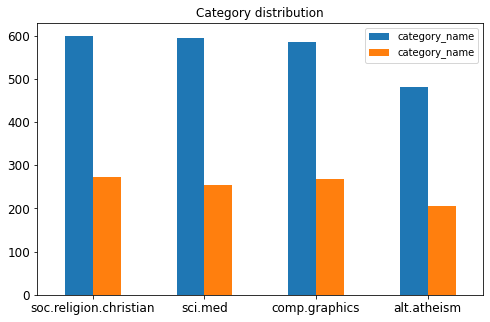

In [9]:
# Answer here
X_EX8 = pd.concat([X.category_name.value_counts(),
                   X_sample.category_name.value_counts()],axis=1)

X_EX8.plot(kind = 'bar',
           title = 'Category distribution',
           ylim = [0, None],
           rot = 0, fontsize = 12, figsize = (8,5))


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [11]:
# Answer here
count_vect.get_feature_names()[np.where(X_counts.toarray()[4]==1)[0][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

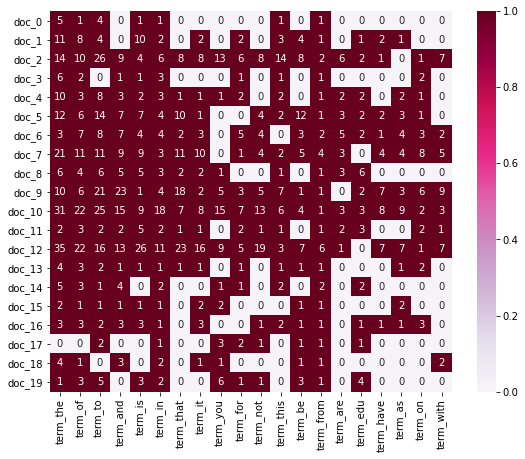

In [12]:
# Answer here
terms = count_vect.get_feature_names()
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
sorted_terms = np.argsort(-term_frequencies)
N=20
plot_x = ["term_"+str(terms[i]) for i in sorted_terms[:N]]
plot_y = ["doc_"+ str(_) for _ in X.index[:N]]
plot_ex11 = X_counts[:N,sorted_terms[:N]].toarray()

df_todraw = pd.DataFrame(plot_ex11, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [13]:
from sklearn.decomposition import PCA

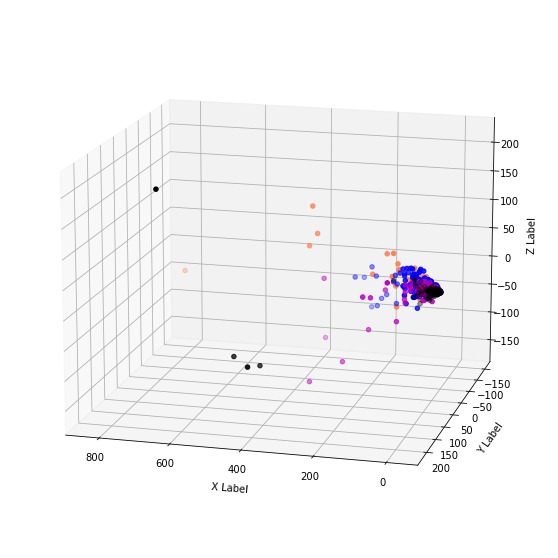

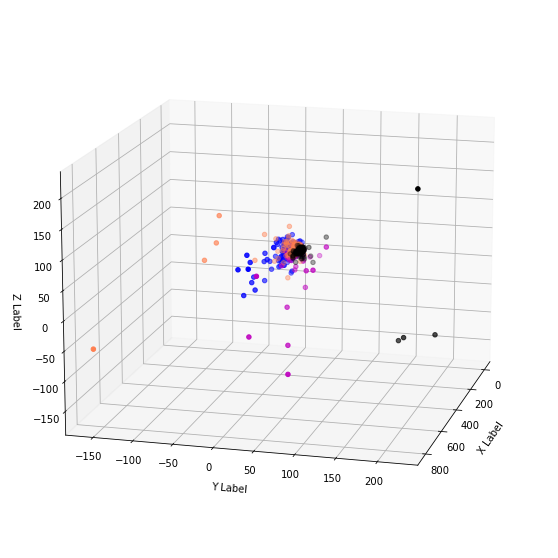

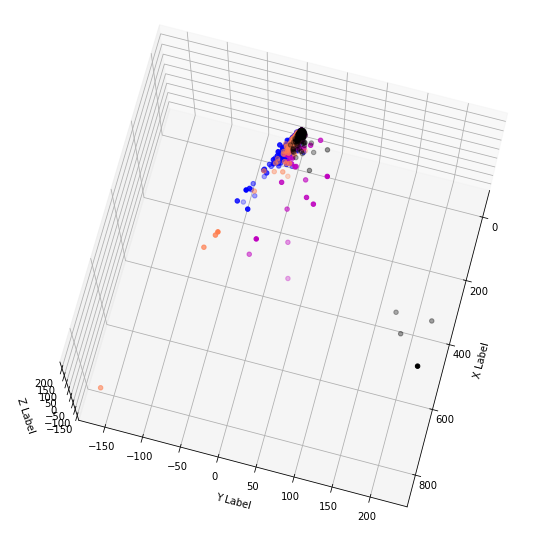

In [14]:
# Answer here

def plot_ex12(elev=30.,azim=-60.):
    X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
    col = ['coral', 'blue', 'black', 'm']
    fig = plt.figure(figsize = (25,10))
    ax = fig.gca(projection='3d')
    
    for c, category in zip(col, categories):
        xs,ys,zs = X_reduced_3[X['category_name'] == category].T[0:3]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=elev, azim=azim)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    plt.show()

plot_ex12(elev=15.,azim=105)
plot_ex12(elev=15.,azim=15)
plot_ex12(elev=75.,azim=15)

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

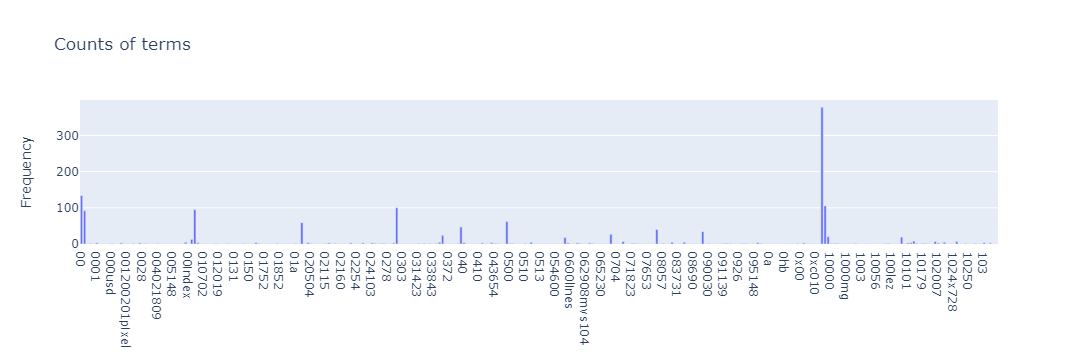

In [15]:
# Answer here
#from helpers.text_analysis import plot_word_frequency
from plotly.graph_objs import Bar,Layout 
import plotly.offline as py 
import plotly.graph_objs as go


trace = go.Bar(x=terms[:300], y=term_frequencies[:300],name = 'counts')
layout = go.Layout(title='Counts of terms')
layout = {"title": 'Counts of terms',
          "yaxis": {"title": "Frequency"}}
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


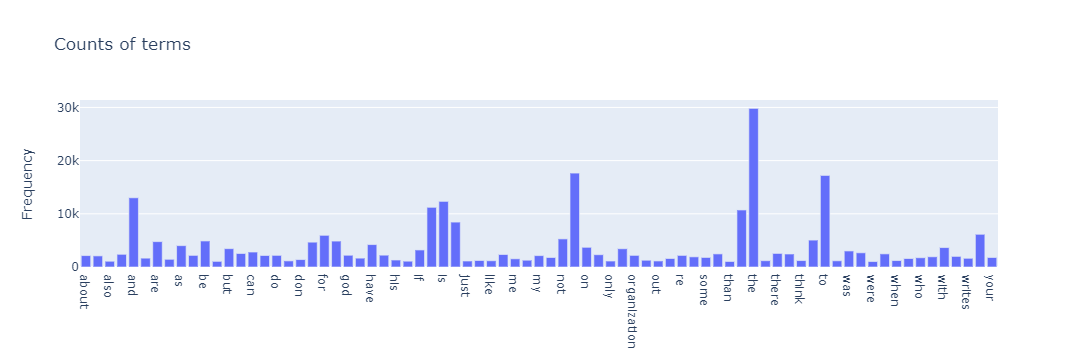

In [16]:
# Answer here
term_frequencies_, terms_= [],[]
for i,v in enumerate(term_frequencies):
    if v>1000:
        term_frequencies_.append(v)
        terms_.append(terms[i])
        
trace = go.Bar(x=terms_, y=term_frequencies_,name = 'counts')
layout = go.Layout(title='Counts of terms')
layout = {"title": 'Counts of terms',
          "yaxis": {"title": "Frequency"}}
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

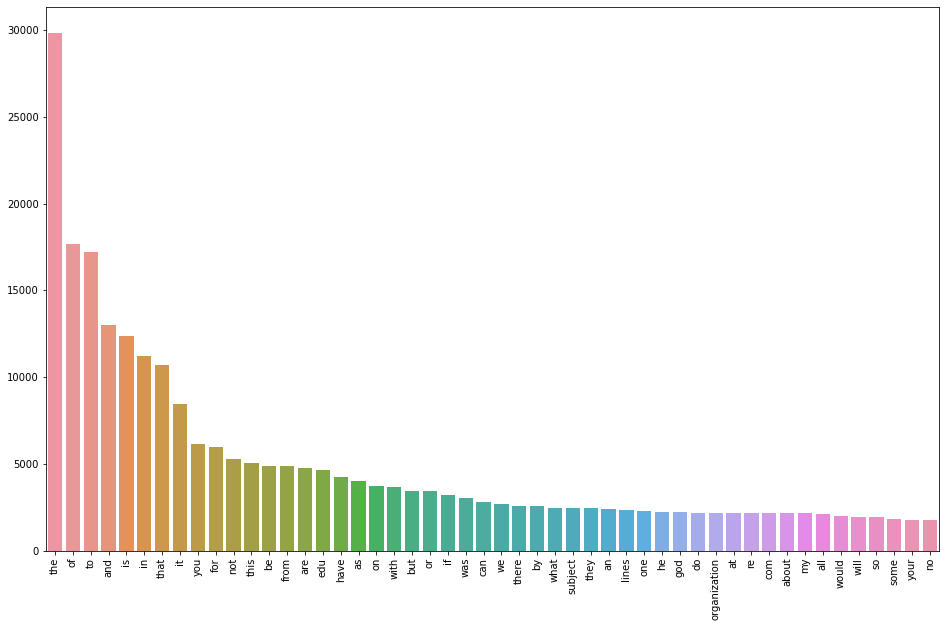

In [17]:
# Answer here
freq_dec_order = list((-term_frequencies).argsort())[:50]
plt.subplots(figsize=(16, 10))
g = sns.barplot(x=[count_vect.get_feature_names()[i] for i in freq_dec_order], 
                y=term_frequencies[freq_dec_order[:100]])
g.set_xticklabels([count_vect.get_feature_names()[i] for i in freq_dec_order], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [18]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()

In [19]:
# Answer here
mlb_ex16 = preprocessing.LabelBinarizer()
mlb_ex16.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 0, 0, 0]  
1           comp.graphics  [0, 0, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 0]  
3  soc.religion.christian  [0, 0, 0, 0]  
4  soc.religion.christian  [0, 0, 0, 0]  
5  soc.religion.christian  [0, 0, 0, 0]  
6  soc.religion.christian  [0, 0, 0, 0]  
7                 sci.med  [0, 0, 0, 0]  
8                 sci.med  [0, 0, 0, 0]

---

## **Part 2:** New Dataset

### 1. Data Preperation + Transformation

In [20]:
# Read file
rawdata = []
for file_name in ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']:
    with open(f'sentiment labelled sentences/{file_name}', 'r',encoding="utf-8") as f:
        rawdata.extend(f.readlines())

In [21]:
# create dataframe     
data = {'sentence':[], 'score':[]} 
for line in rawdata:
    sentence, score = line.split('\t')
    data['sentence'].append(sentence)
    data['score'].append(int(score))
df = pd.DataFrame(data)

In [22]:
len(df)

3000

### 2. Data Mining Using Pandas

#### 2.1 Missing Values

In [23]:
# Check missing values:
df.isnull().apply(lambda x: dmh.check_missing_values(x))
#-> no missing values! great!

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

#### 2.2 Dealing with Duplicated Data <a id='2.2'></a>

In [24]:
# Check duplicated data:
sum(df['sentence'].duplicated())
df.loc[df['sentence'].duplicated()]

sentence  score
285                                       Great phone!.      1
407                                        Works great.      1
524                                       Works great!.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
792                                        Great Phone.      1
892                    Excellent product for the price.      1
896                                        Great phone.      1
1363                   Definitely worth checking out.        1
1585                                 Not recommended.        0
1788                                            10/10        1
2814                                 I love this place.      1
2816                             The food was terrible.      0
2843                                   I won't be back.      0
2846                  I would not recommend this place.      0

In [25]:
# Lowercase and remove the puncuations to make them case insensitive
import string
trans_table = str.maketrans('', '', string.punctuation)
df['sentence'] = df['sentence'].apply(lambda x: x.translate(trans_table).lower())
sum(df['sentence'].duplicated())
df.loc[df['sentence'].duplicated()]

sentence  score
143                                   very disappointed      0
262                                         works great      1
268                               dont waste your money      0
285                                         great phone      1
290                                         great phone      1
407                                         works great      1
524                                         works great      1
543                               dont buy this product      0
647                                         great phone      1
744   if you like a loud buzzing to override all you...      0
748                                        does not fit      0
768                                       great product      1
778                                this is a great deal      1
792                                         great phone      1
832                                         dont buy it      0
892                     excellent product for the price      1
896                                         great phone      1
982                               dont waste your money      0
993                                        disappointed      0
1363                    definitely worth checking out        1
1585                                  not recommended        0
1788                                             1010        1
1801                               avoid at all costs        0
2621                                 very disappointing      0
2744                                   will not be back      0
2814                                  i love this place      1
2816                              the food was terrible      0
2843                                     i wont be back      0
2846                   i would not recommend this place      0

In [26]:
# Drop duplicates
df.drop_duplicates(keep="first", inplace=True)
len(df)

2971

### 3. Data Preprocessing

#### 3.1 Sampling

1    1486
0    1485
Name: score, dtype: int64
0    503
1    497
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

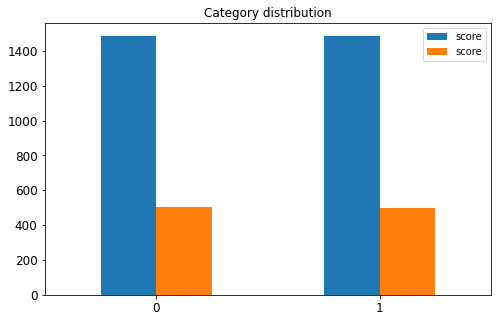

In [27]:
df_sample = df.sample(n=1000)
print(df.score.value_counts())
print(df_sample.score.value_counts())
score_count = pd.concat([df.score.value_counts(),
                         df_sample.score.value_counts()],axis=1)
score_count.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, None],
                 rot = 0, fontsize = 12, figsize = (8,5))

#### 3.2 Feature Creation

In [28]:
# import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df['unigrams'][0:5]

0    [so, there, is, no, way, for, me, to, plug, it...
1                       [good, case, excellent, value]
2                           [great, for, the, jawbone]
3    [tied, to, charger, for, conversations, lastin...
4                                [the, mic, is, great]
Name: unigrams, dtype: object

#### 3.3 Feature subset selection

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df.sentence)
words = count_vect.get_feature_names()
words[:10]

['010', '10', '100', '1010', '11', '110', '1199', '12', '13', '15']

#### 3.4 Atrribute Transformation / Aggregation

In [30]:
import seaborn as sns
term_frequencies = np.asarray(counts.sum(axis=0))[0]
freq_dec_order = list((-term_frequencies).argsort())[:50]

[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'is'),
 Text(3, 0, 'to'),
 Text(4, 0, 'it'),
 Text(5, 0, 'this'),
 Text(6, 0, 'of'),
 Text(7, 0, 'was'),
 Text(8, 0, 'in'),
 Text(9, 0, 'for'),
 Text(10, 0, 'that'),
 Text(11, 0, 'not'),
 Text(12, 0, 'with'),
 Text(13, 0, 'my'),
 Text(14, 0, 'very'),
 Text(15, 0, 'good'),
 Text(16, 0, 'on'),
 Text(17, 0, 'you'),
 Text(18, 0, 'but'),
 Text(19, 0, 'great'),
 Text(20, 0, 'have'),
 Text(21, 0, 'are'),
 Text(22, 0, 'movie'),
 Text(23, 0, 'as'),
 Text(24, 0, 'so'),
 Text(25, 0, 'phone'),
 Text(26, 0, 'film'),
 Text(27, 0, 'its'),
 Text(28, 0, 'one'),
 Text(29, 0, 'be'),
 Text(30, 0, 'all'),
 Text(31, 0, 'had'),
 Text(32, 0, 'at'),
 Text(33, 0, 'food'),
 Text(34, 0, 'like'),
 Text(35, 0, 'just'),
 Text(36, 0, 'place'),
 Text(37, 0, 'time'),
 Text(38, 0, 'were'),
 Text(39, 0, 'service'),
 Text(40, 0, 'an'),
 Text(41, 0, 'from'),
 Text(42, 0, 'really'),
 Text(43, 0, 'if'),
 Text(44, 0, 'there'),
 Text(45, 0, 'they'),
 Text(46, 0, 'bad'),
 Text

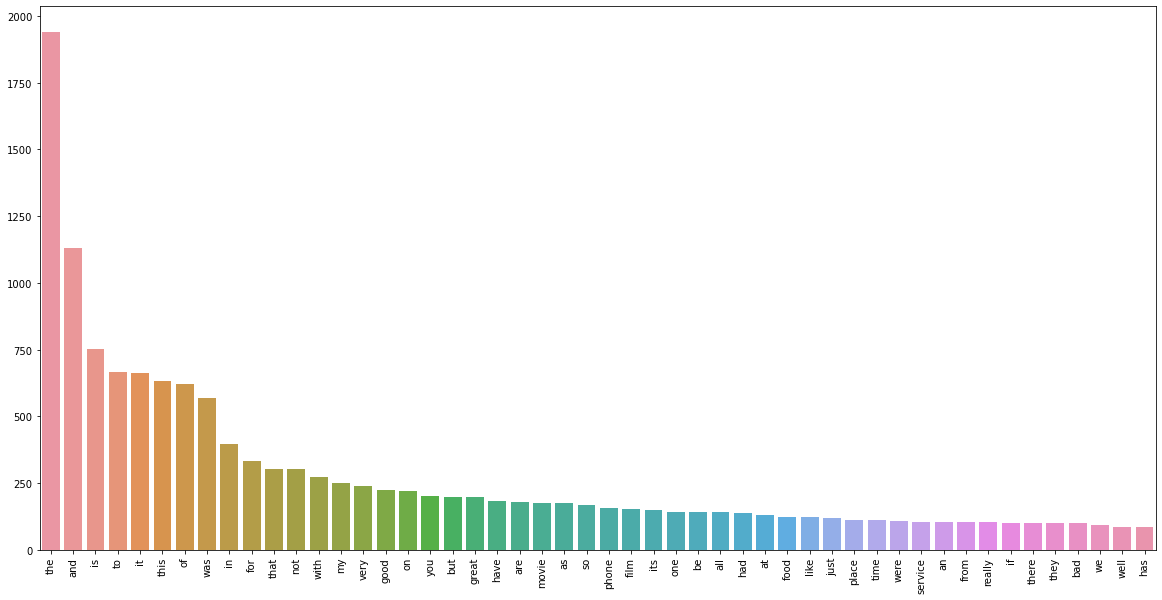

In [31]:
plt.subplots(figsize=(20, 10))
g = sns.barplot(x=[words[i] for i in freq_dec_order], 
                y=term_frequencies[freq_dec_order[:50]])
g.set_xticklabels([words[i] for i in freq_dec_order], rotation = 90)

---

## **Part 3:** New Dataset: 
 **-Visualization, TF-IDF and Naive Bayes Classifier**

### 1. Data Visualizations

#### 1.1 Bar Plots

[Text(0, 0, 'the'),
 Text(0, 1, 'and'),
 Text(0, 2, 'is'),
 Text(0, 3, 'this'),
 Text(0, 4, 'it'),
 Text(0, 5, 'of'),
 Text(0, 6, 'to'),
 Text(0, 7, 'was'),
 Text(0, 8, 'in'),
 Text(0, 9, 'great'),
 Text(0, 10, 'good'),
 Text(0, 11, 'for'),
 Text(0, 12, 'with'),
 Text(0, 13, 'very'),
 Text(0, 14, 'that'),
 Text(0, 15, 'my'),
 Text(0, 16, 'on'),
 Text(0, 17, 'are'),
 Text(0, 18, 'film'),
 Text(0, 19, 'you'),
 Text(0, 20, 'have'),
 Text(0, 21, 'so'),
 Text(0, 22, 'but'),
 Text(0, 23, 'as'),
 Text(0, 24, 'its'),
 Text(0, 25, 'movie'),
 Text(0, 26, 'phone'),
 Text(0, 27, 'one'),
 Text(0, 28, 'had'),
 Text(0, 29, 'all')]

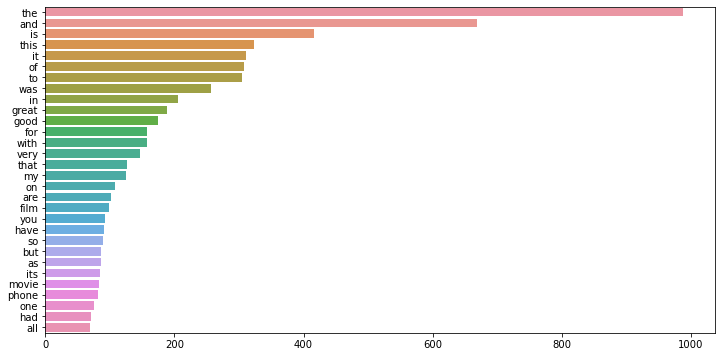

In [32]:
# Positive terms
good_term_frequencies = counts.toarray()[df['score']==1].sum(axis=0)
freq_dec_order_gd = list((-good_term_frequencies).argsort())[:30]

plt.subplots(figsize=(12,6))
gd = sns.barplot(y=[words[i] for i in freq_dec_order_gd], 
                 x=good_term_frequencies[freq_dec_order_gd[:30]])
gd.set_yticklabels([words[i] for i in freq_dec_order_gd])

[Text(0, 0, 'the'),
 Text(0, 1, 'and'),
 Text(0, 2, 'to'),
 Text(0, 3, 'it'),
 Text(0, 4, 'is'),
 Text(0, 5, 'of'),
 Text(0, 6, 'was'),
 Text(0, 7, 'this'),
 Text(0, 8, 'not'),
 Text(0, 9, 'in'),
 Text(0, 10, 'that'),
 Text(0, 11, 'for'),
 Text(0, 12, 'my'),
 Text(0, 13, 'with'),
 Text(0, 14, 'but'),
 Text(0, 15, 'on'),
 Text(0, 16, 'you'),
 Text(0, 17, 'bad'),
 Text(0, 18, 'very'),
 Text(0, 19, 'movie'),
 Text(0, 20, 'have'),
 Text(0, 21, 'as'),
 Text(0, 22, 'be'),
 Text(0, 23, 'at'),
 Text(0, 24, 'so'),
 Text(0, 25, 'are'),
 Text(0, 26, 'phone'),
 Text(0, 27, 'all'),
 Text(0, 28, 'there'),
 Text(0, 29, 'one')]

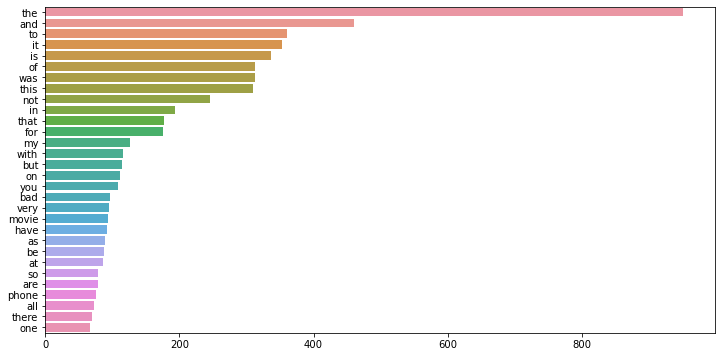

In [33]:
# Negative terms
bad_term_frequencies = counts.toarray()[df['score']==0].sum(axis=0)
freq_dec_order_bd = list((-bad_term_frequencies).argsort())[:30]

plt.subplots(figsize=(12,6))
bd = sns.barplot(y=[words[i] for i in freq_dec_order_bd], 
                 x=bad_term_frequencies[freq_dec_order_bd[:30]])
bd.set_yticklabels([words[i] for i in freq_dec_order_bd])

#### 1.2 Word Cloud

In [34]:
from wordcloud import WordCloud

def plot_wordcloud(df,title = 'WordCloud'):
    plt.figure()
    cloud = WordCloud(width = 800, height = 600, max_words=50)
    cloud.generate_from_frequencies(df['freq'])
    plt.title(title)
    plt.imshow(cloud)

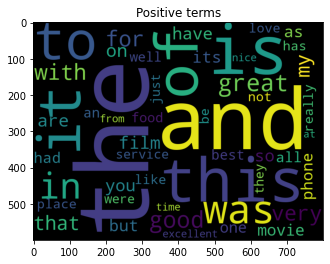

In [35]:
# Positive terms
good_term_freq_df = pd.DataFrame({'freq':good_term_frequencies/good_term_frequencies.sum()}, index = words)
plot_wordcloud(good_term_freq_df,'Positive terms')

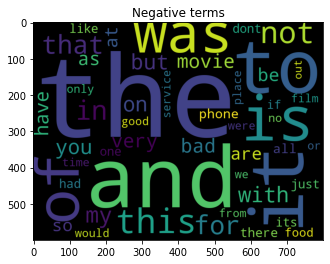

In [36]:
# Negative terms
bad_term_freq_df = pd.DataFrame({'freq':bad_term_frequencies/bad_term_frequencies.sum()}, index = words)
plot_wordcloud(bad_term_freq_df,'Negative terms')

### 2. TF-IDF

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df.sentence)
vectorizer.get_feature_names()[:10]
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names())
df_tfidf_dec_proportion = df_tfidf.mean(axis=0).sort_values(ascending=False)
df_tfidf_dec_proportion[:10]

the     0.059099
and     0.039674
is      0.035675
it      0.034209
this    0.032371
was     0.031452
to      0.028125
of      0.026277
not     0.020201
in      0.019656
dtype: float64

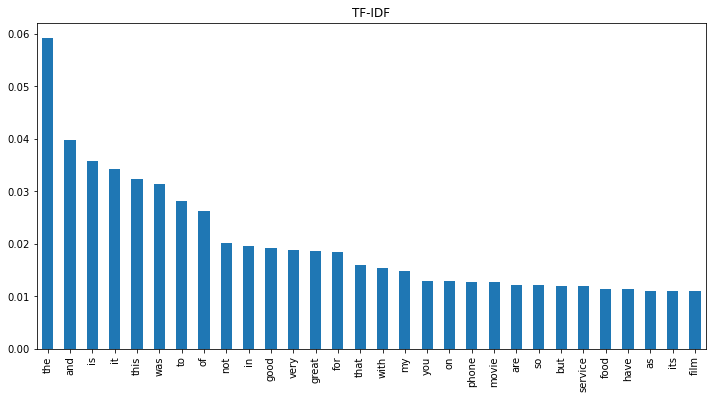

In [38]:
# Plot
plt.subplots(figsize=(12,6))
df_tfidf_dec_proportion[:30].plot(kind = 'bar', title = 'TF-IDF')
plt.show()

### 3. Naive Bayes classifier

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### 3.1 Training

In [40]:
# Train Test Split
df_train, df_test = train_test_split(df, test_size=500)

In [41]:
# Classifier Training
nb_clf_tf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb_clf_tf.fit(df_train['sentence'],df_train['score'])

nb_clf_tfidf = Pipeline([('vect', TfidfVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb_clf_tfidf.fit(df_train['sentence'],df_train['score'])

Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

#### 3.2 Prediciton Results

In [42]:
# Accuracy
prediction_tf = nb_clf_tf.predict(df_test.sentence)
accuracy_tf = sum((prediction_tf == df_test.score)/prediction_tf.shape[0])
print(f'Accuracy of NB-Classifier using TF = {accuracy_tf*100:.2f}%')

prediction_tfidf = nb_clf_tfidf.predict(df_test.sentence)
accuracy_tfidf = sum((prediction_tfidf == df_test.score)/prediction_tfidf.shape[0])
print(f'Accuracy of NB-Classifier using TF-IDF = {accuracy_tfidf*100:.2f}%')

Accuracy of NB-Classifier using TF = 83.40%
Accuracy of NB-Classifier using TF-IDF = 80.40%


#### 3.3 Confustion Matrix

In [43]:
def plot_confusion_matrix(real,prediction,title = 'confusion_matrix'):
    sns.heatmap(confusion_matrix(real, prediction),
                square= True, annot=True, cbar= False, fmt = '.20g')
    plt.title(title)
    plt.xlabel("predicted value")
    plt.ylabel("true value")
    plt.show()

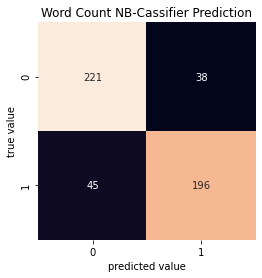

In [44]:
#Word count prediction
plot_confusion_matrix(df_test.score,prediction_tf,'Word Count NB-Cassifier Prediction')

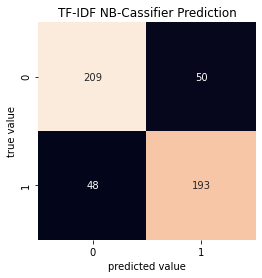

In [45]:
# TF-IDF Prediction
plot_confusion_matrix(df_test.score,prediction_tfidf,'TF-IDF NB-Cassifier Prediction')

Results above shows that the performance of NB classifier lightly better when using TF, comparing to the one using TF-IDF.

---

## Part 4: Data Preprocessing Improvements

### 1. Lower Case and Deleting Punctuations

In the [Part 2.2](#2.2) while dealing with duplicated data instead of droping the duplicated directly at the fist place,
I lower cased the characters, and removed the punctuations, which are meaning less, and block us from finding all the duplicates.

In [46]:
# Duplicates Found doing nothing
df2 = pd.DataFrame(data)
sum(df2['sentence'].duplicated())

17

In [47]:
# Duplicates found with lower case
df2['sentence'] = df2['sentence'].apply(lambda x: x.lower())
sum(df2['sentence'].duplicated())

20

In [48]:
# Duplicates found with lower case and punctuation deleted
df2['sentence'] = df2['sentence'].apply(lambda x: x.translate(trans_table).lower())
sum(df2['sentence'].duplicated())

29

Comparing above results, the effect of the process is clear, while 3 and 9 more duplicates are found while doing lower case and punctuation deletion

### 2. Removing Stop Words

From term frequncy box plots previosly shown, it's very clear that ther most frequenlty used word are the ones such as adpositions, conjunctions and particles, they are also know as "function words" or "stop words", which aren't realy meaningful. 
    
For an example: "the", "and", "is", "it", "this" and "of" are the most frequently shown words in both positive and negative sentence, but they don't help us distinguish beteen scores.

Therefore, in my improvements, stop words are deleted for a more efficient classiy and analysis.

In [49]:
df2['unigrams'] = df2['sentence'].apply(lambda x: dmh.tokenize_text(x,remove_stopwords=True))
df2['sentence'] = df2['unigrams'].apply(lambda x: ' '.join(x))

### 3. Visualization: After Adjustments

In [50]:
count_vect2 = CountVectorizer()
counts2 = count_vect2.fit_transform(df2.sentence)
words2 = count_vect2.get_feature_names()

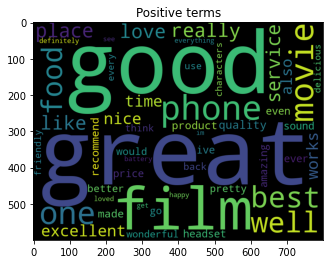

In [51]:
# Positive terms
good_term_frequencies2 = counts2.toarray()[df2['score']==1].sum(axis=0)
freq_dec_order_gd2 = list((-good_term_frequencies2).argsort())[:30]
good_term_freq_df2 = pd.DataFrame({'freq':good_term_frequencies2/good_term_frequencies2.sum()}, index = words2)
plot_wordcloud(good_term_freq_df2,'Positive terms')

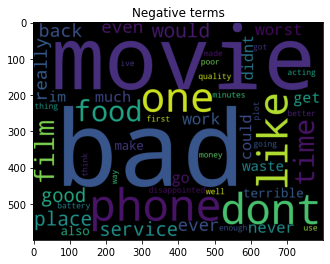

In [52]:
# Negative terms
bad_term_frequencies2 = counts2.toarray()[df2['score']==0].sum(axis=0)
freq_dec_order_bd2 = list((-bad_term_frequencies2).argsort())[:30]
bad_term_freq_df2 = pd.DataFrame({'freq':bad_term_frequencies2/bad_term_frequencies2.sum()}, index = words2)
plot_wordcloud(bad_term_freq_df2,'Negative terms')

Great! Now we see which are the keywords!
We can now find the words that should obviosly be negative/positive

example:    
- Positive: good, great, nice, excellent
- Negative: bad, waste

### 4. Training: After Adjustments
Same Proccess as Part 3-3

In [53]:
# Train Test Split
df2_train, df2_test = train_test_split(df2, test_size=500)

In [54]:
# Classifier Training
nb_clf_tf2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb_clf_tf2.fit(df2_train['sentence'],df2_train['score'])

nb_clf_tfidf2 = Pipeline([('vect', TfidfVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
nb_clf_tfidf2.fit(df2_train['sentence'],df2_train['score'])

Pipeline(steps=[('vect', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

#### 4. Prediciton Results

In [55]:
# Accuracy
prediction_tf2 = nb_clf_tf2.predict(df2_test.sentence)
accuracy_tf2 = sum((prediction_tf2 == df2_test.score)/prediction_tf2.shape[0])
print(f'Accuracy of NB-Classifier using TF = {accuracy_tf2*100:.2f}%')

prediction_tfidf2 = nb_clf_tfidf2.predict(df2_test.sentence)
accuracy_tfidf2 = sum((prediction_tfidf2 == df2_test.score)/prediction_tfidf2.shape[0])
print(f'Accuracy of NB-Classifier using TF-IDF = {accuracy_tfidf2*100:.2f}%')

Accuracy of NB-Classifier using TF = 82.40%
Accuracy of NB-Classifier using TF-IDF = 82.80%


#### 3.3 Confustion Matrix

In [56]:
def plot_confusion_matrix(real,prediction,title = 'confusion_matrix'):
    sns.heatmap(confusion_matrix(real, prediction),
                square= True, annot=True, cbar= False, fmt = '.20g')
    plt.title(title)
    plt.xlabel("predicted value")
    plt.ylabel("true value")
    plt.show()

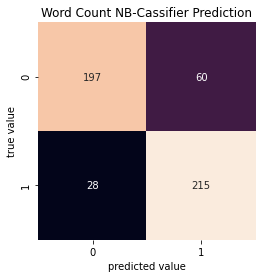

In [57]:
#Word count prediction
plot_confusion_matrix(df2_test.score,prediction_tf2,'Word Count NB-Cassifier Prediction')

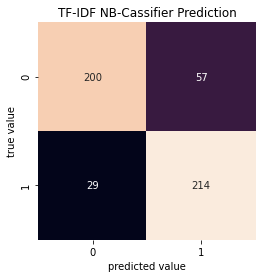

In [58]:
# TF-IDF Prediction
plot_confusion_matrix(df2_test.score,prediction_tfidf2,'TF-IDF NB-Cassifier Prediction')

After aplying these adjustments, we can't see much difference for the NB Classifier, (sometimes better, sometimes worse).
However the visualization (word cloud) gets much more valueable. 